<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Найти-аэропорт-с-минимальной-задержкой-вылета" data-toc-modified-id="Найти-аэропорт-с-минимальной-задержкой-вылета-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Найти аэропорт с минимальной задержкой вылета</a></span></li><li><span><a href="#Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport" data-toc-modified-id="Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport</a></span></li><li><span><a href="#Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет" data-toc-modified-id="Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аэропорт с самой большой долей руления на 1 самолетовылет</a></span></li><li><span><a href="#Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),-в-зависимости-от-аэропорта-вылета" data-toc-modified-id="Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),-в-зависимости-от-аэропорта-вылета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика), в зависимости от аэропорта вылета</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Выбор-параметров-и-получение-результата" data-toc-modified-id="Выбор-параметров-и-получение-результата-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выбор параметров и получение результата</a></span></li></ul></li></ul></div>

[Данные - https://www.kaggle.com/usdot/flight-delays  ](https://www.kaggle.com/usdot/flight-delays) 

Описание - Сводная информация о количестве своевременных, задержанных, отмененных и измененных рейсов в США за 2015 год (5.8 млн записей)
Задачи:
1	Найти аэропорт с минимальной задержкой вылета 
2	Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport
3	Аэропорт с самой большой долей руления на 1 самолетовылет
4	Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета  

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
%%time
airlines= pd.read_csv('data/airlines.csv')
airports= pd.read_csv('data/airports.csv')
flights= pd.read_csv('data/flights.csv',dtype={'ORIGIN_AIRPORT':str,'DESTINATION_AIRPORT':str})

Wall time: 22.5 s


In [3]:
%%time
flights1=flights.merge(airports[['IATA_CODE','AIRPORT']], how='inner', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE').drop (['IATA_CODE'], axis = 1)

Wall time: 2min 39s


In [4]:
%%time
flights2=flights1.merge(airports[['IATA_CODE','AIRPORT']], how='inner', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE').drop (['IATA_CODE',], axis = 1)

Wall time: 18min 3s
Compiler : 586 ms
Parser   : 762 ms


In [5]:
%%time
flights3=flights2.merge(airlines, how='inner', left_on='AIRLINE', right_on='IATA_CODE').drop (['IATA_CODE'], axis = 1)

Wall time: 6min 16s
Compiler : 1.89 s
Parser   : 1.1 s


In [6]:
%%time
flights_real= flights3[~flights3.DIVERTED.isin([1])& ~flights3.CANCELLED.isin([1])].copy()

Wall time: 4min 52s
Compiler : 484 ms
Parser   : 2.85 s


In [7]:
flights_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5332913
Data columns (total 34 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
flights_real.nunique()

YEAR                      1
MONTH                    11
DAY                      31
DAY_OF_WEEK               7
AIRLINE_x                14
FLIGHT_NUMBER          6946
TAIL_NUMBER            4895
ORIGIN_AIRPORT          322
DESTINATION_AIRPORT     322
SCHEDULED_DEPARTURE    1317
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1193
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          543
ELAPSED_TIME            711
AIR_TIME                675
DISTANCE               1350
WHEELS_ON              1440
TAXI_IN                 184
SCHEDULED_ARRIVAL      1433
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1222
DIVERTED                  1
CANCELLED                 1
CANCELLATION_REASON       0
AIR_SYSTEM_DELAY        563
SECURITY_DELAY          154
AIRLINE_DELAY          1042
LATE_AIRCRAFT_DELAY     690
WEATHER_DELAY           623
AIRPORT_x               322
AIRPORT_y               322
AIRLINE_y                14
dtype: int64

In [9]:
flights_real.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5231130.0,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,5.231130e+06,...,5.231130e+06,5.231130e+06,5.231130e+06,5231130.0,5231130.0,1.003360e+06,1.003360e+06,1.003360e+06,1.003360e+06,1.003360e+06
mean,2015.0,6.229132e+00,1.569439e+01,3.925630e+00,2.169160e+03,1.329393e+03,1.335922e+03,9.696480e+00,1.609652e+01,1.357846e+03,...,1.493095e+03,1.475775e+03,4.885903e+00,0.0,0.0,1.348775e+01,7.768398e-02,1.890343e+01,2.368808e+01,2.980992e+00
std,0.0,3.377319e+00,8.765630e+00,1.990390e+00,1.758034e+03,4.840959e+02,4.974161e+02,3.739591e+01,8.977498e+00,4.990690e+02,...,5.076731e+02,5.276051e+02,3.978728e+01,0.0,0.0,2.807241e+01,2.180048e+00,4.787141e+01,4.332698e+01,2.062003e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.290000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.058000e+03,-1.300000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,6.000000e+00,1.600000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.331000e+03,-1.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.229000e+03,1.730000e+03,1.741000e+03,8.000000e+00,1.900000e+01,1.755000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.0,0.0,1.800000e+01,0.000000e+00,1.900000e+01,3.000000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,0.0,0.0,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [10]:
flights_real.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_x                    0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5231130
AIR_SYSTEM_DELAY       4227770
SECURITY_DELAY         4227770
AIRLINE_DELAY          4227770
LATE_AIRCRAFT_DELAY    4227770
WEATHER_DELAY          4227770
AIRPORT_x                    0
AIRPORT_

# 	Найти аэропорт с минимальной задержкой вылета

In [11]:
flights_dep_delay=flights_real.query("DEPARTURE_DELAY>=0").groupby(['ORIGIN_AIRPORT','AIRPORT_x' ])['DEPARTURE_DELAY'].median().sort_values().reset_index()
flights_dep_delay.head(10)

,ORIGIN_AIRPORT,AIRPORT_x,DEPARTURE_DELAY
0,PLN,Pellston Regional Airport of Emmet County,0.0
1,BJI,Bemidji Regional Airport,0.0
2,ESC,Delta County Airport,0.0
3,CIU,Chippewa County International Airport,0.0
4,ABR,Aberdeen Regional Airport,0.0
5,WYS,Westerly State Airport,0.0
6,LWS,Lewiston-Nez Perce County Airport,3.0
7,BRD,Brainerd Lakes Regional Airport,3.0
8,HLN,Helena Regional Airport,3.0
9,BLI,Bellingham International Airport,5.0


<AxesSubplot:>

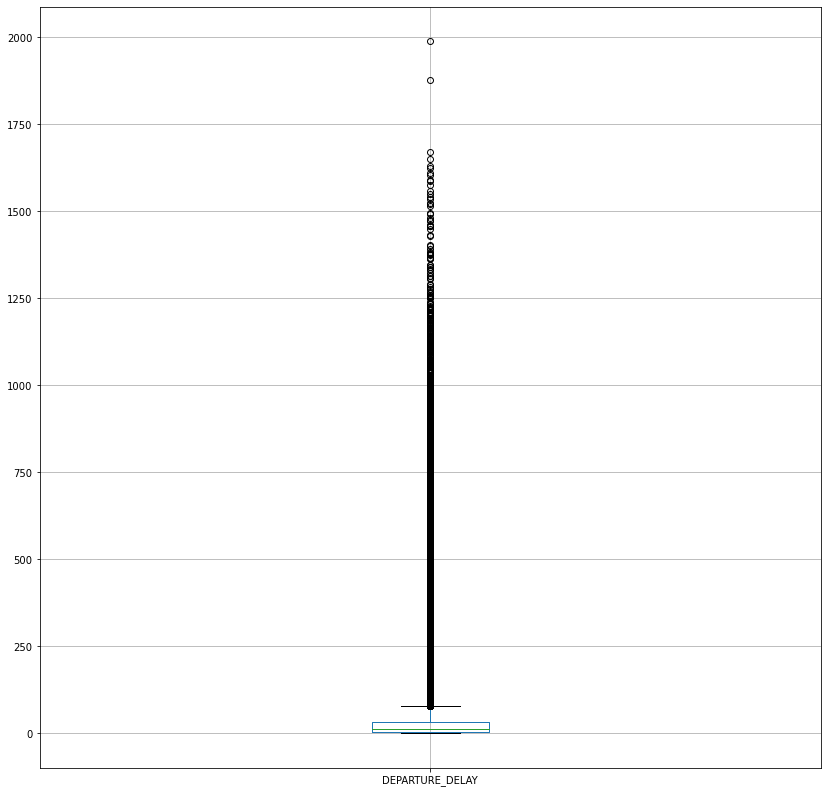

In [12]:
flights_real.query("DEPARTURE_DELAY>=0").boxplot('DEPARTURE_DELAY',figsize = (14, 14))

Использована медиана, а не среднее, так как большое количество выбросов по полю DEPARTURE_DELAY.

#  Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport 

In [13]:
flights_ariv_delay=flights_real.query("ARRIVAL_DELAY>=0 & DESTINATION_AIRPORT=='LAX'").groupby(['AIRLINE_x','AIRLINE_y' ])['ARRIVAL_DELAY'].median().sort_values().reset_index()
flights_ariv_delay.head(1)

,AIRLINE_x,AIRLINE_y,ARRIVAL_DELAY
0,AS,Alaska Airlines Inc.,10.0


<AxesSubplot:>

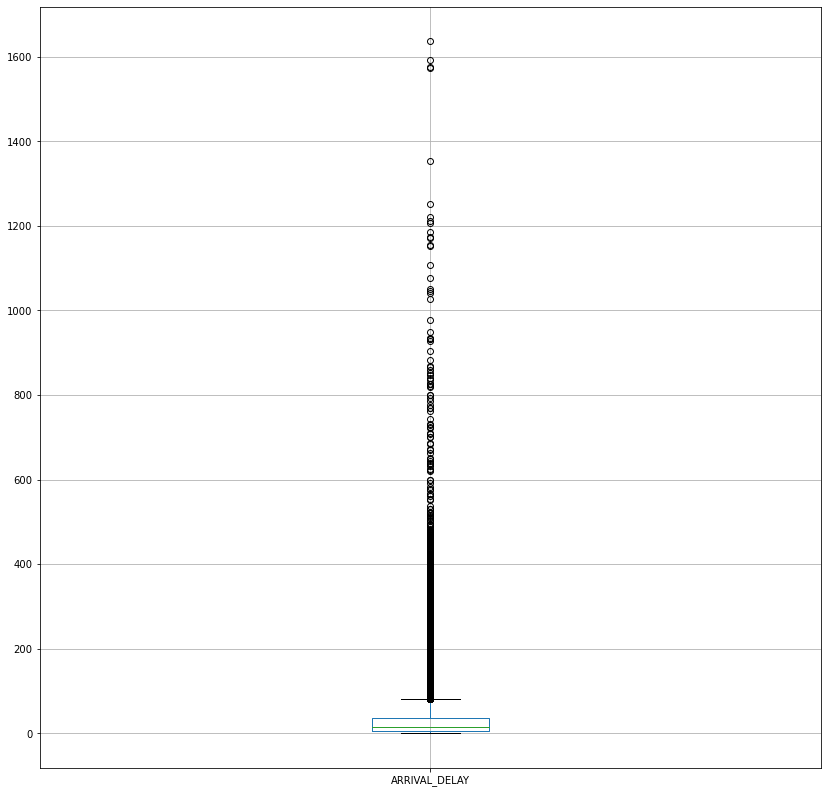

In [14]:
flights_real.query("ARRIVAL_DELAY>=0 & DESTINATION_AIRPORT=='LAX'").boxplot('ARRIVAL_DELAY',figsize = (14, 14))

Использована медиана, а не среднее, так как большое количество выбросов по полю ARRIVAL_DELAY.

# Аэропорт с самой большой долей руления на 1 самолетовылет

In [15]:
flights_TAXI_OUT= (flights_real.groupby(['ORIGIN_AIRPORT','AIRPORT_x']).TAXI_OUT.sum()/flights_real.groupby(['ORIGIN_AIRPORT','AIRPORT_x']).YEAR.count()).sort_values(ascending=False).reset_index()
flights_TAXI_OUT.head(1)

,ORIGIN_AIRPORT,AIRPORT_x,0
0,JFK,John F. Kennedy International Airport (New Yor...,26.995582
